# Introduction to clustering

#### Outline

- What is clustering?
- Why is it used?
- How to evaluate it?
- How to choose a clustering algorithm?

## What is clustering?

Wikipedia: _"Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters)."_

### Clustering is Unsupervised Classification

A clustering problem is defined by a set of data points on which we don't know the characteristics, but that we want to group together in a smart way.

#### Toy data generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

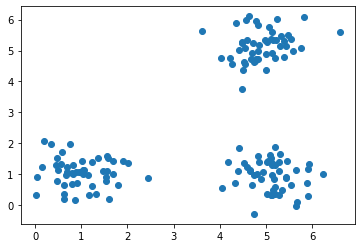

In [2]:
means = [np.array([1, 1]), np.array([5, 5]), np.array([5, 1])]
covariance = np.array([[0.25, 0], [0, 0.25]])
n_points = 50

data = [np.random.multivariate_normal(mean=means[i], cov=covariance, size=n_points) for i in range(3)]
all_data = np.r_[data[0], data[1], data[2]]

plt.scatter(all_data[:, 0], all_data[:,1])
plt.show()

#### Objective

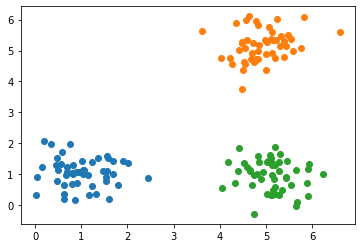

In [3]:
plt.scatter(data[0][:, 0], data[0][:,1])
plt.scatter(data[1][:, 0], data[1][:,1])
plt.scatter(data[2][:, 0], data[2][:,1])
plt.show()

## Why do we use clustering?

- Computer science
    - Recommender systems
    - Spam filtering
    - etc.
- Ecology
    - Species identification
    - Land use identification
    - etc.
- Epidemiology
    - Covid contaminations prediction

## How do we evaluate clustering results?

### Internal metric:

- Silhouette coefficient
- Davies–Bouldin index
- Dunn Index

### External metrics

- Purity
- Clustering accuracy
- Folkes-Mallows index
- Normalized Mutual Information

### Example internal metric: Silhouette coefficient

For a data point $x_i$, which is associated to cluster $C(i)$, we note a(i) the mean distance between x_i and other points in C(i):\
$$a(i)=\frac{1}{|C(i)|-1} \sum_{j \in C(i), j \neq i} d(x_i, x_j)$$\
and we note b(i) the mean distance between x_i and the points of the closest other cluster:\
$$b(i)=\min_{k \neq C(i)} \frac{1}{|C_k|}\sum_{j\in C_k} d(x_i, x_j)$$
Then, the silhouette for point x_i is:
$$s(i) = \frac{b(i)-a(i)}{max(a(i), b(i))}$$
And the silhouette for the entire dataset is
$$S = \frac{1}{K} \sum_{k=1}^K \frac{1}{|C_k|} \sum_{i \in C_k} s(i)$$

#### Visualize silhouette: correct clusters

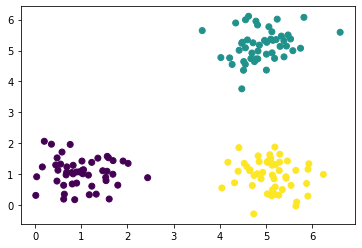

Silhouette =  0.7827586679364851


In [4]:
from sklearn.metrics import silhouette_score

correct_clusters = np.array([0] * n_points + [1] * n_points + [2] * n_points)

plt.scatter(all_data[:, 0], all_data[:, 1], c=correct_clusters)
plt.show()

print("Silhouette = ", silhouette_score(all_data, correct_clusters))

#### Visualize silhouette: random clusters

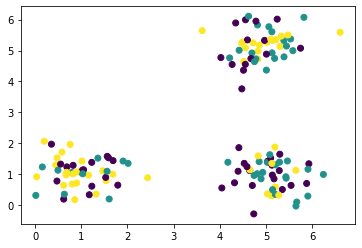

Silhouette =  -0.0468968034031849


In [5]:
random_clusters = np.random.randint(0, 3, 150)
plt.scatter(all_data[:, 0], all_data[:, 1], c=random_clusters)
plt.show()

print("Silhouette = ", silhouette_score(all_data, random_clusters))

#### Visualize silhouette: only two clusters

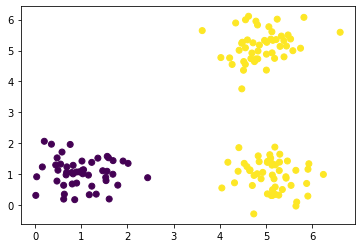

Silhouette =  0.5786289464914277


In [6]:
twogroups_clusters = np.array([0] * n_points + [1] * 2 * n_points)
plt.scatter(all_data[:, 0], all_data[:, 1], c=twogroups_clusters)
plt.show()

print("Silhouette = ", silhouette_score(all_data, twogroups_clusters))

#### Visualize silhouette: many clusters

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]


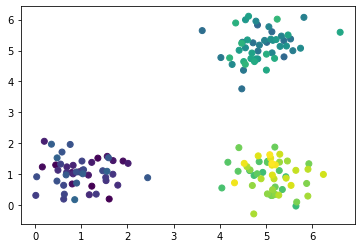

Silhouette =  -0.006231778042121452


In [7]:
many_clusters = [0] + [i for i in range(int(3*n_points)-1)]
print(many_clusters)
plt.scatter(all_data[:, 0], all_data[:, 1], c=many_clusters)
plt.show()

print("Silhouette = ", silhouette_score(all_data, many_clusters))

### Example external metric

$\to$ Need for specific clustering metrics when ground truth is known

#### Example: Purity
Let's call $\mathcal{C}$ the clusters found, and $\mathcal{D}$ the ground truth classes:

$$purity = \frac{1}{N} \sum_{k \in \mathcal{C}} \max_{d \in D} |k \cap d|$$

## Choosing a clustering algorithm

#### Different families of clustering algorithms

- partitioning-based
- connectivity-based
- density-based

<img src="images/clusteringAlgo_comparison_scikitLearn.png" width="1000px"/>